In [30]:
'''
Problem Statement:

Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network  
f. Plot the training loss and accuracy
'''

'\nProblem Statement:\n\nImplementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:\na. Import the necessary packages\nb. Load the training and testing data\nc. Define the network architecture using Keras\nd. Train the model using SGD with 11 epochs\ne. Evaluate the network  \nf. Plot the training loss and accuracy\n'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

In [32]:
train = pd.read_csv("/home/tanisha/DL/LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:

test = pd.read_csv("/home/tanisha/DL/LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train.isnull().sum().sum()


0

In [35]:

x_train = train.drop(['label'], axis=1).values
x_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:

x_train = x_train.astype('float32')/255

In [37]:

y_train = train['label'].values

In [38]:

# c. Define the network architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape = (784, ) ,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:

history = model.fit(x_train, y_train, epochs=11, batch_size=32, validation_split=0.2)

r = model.fit(x_train, y_train, validation_split= 0.2, batch_size = 128, epochs = 11)
     

Epoch 1/11
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.9070 - val_loss: 0.1453 - val_accuracy: 0.9564
Epoch 2/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1369 - accuracy: 0.9589 - val_loss: 0.1117 - val_accuracy: 0.9658
Epoch 3/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.0880 - val_accuracy: 0.9725
Epoch 4/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0769 - accuracy: 0.9764 - val_loss: 0.0952 - val_accuracy: 0.9714
Epoch 5/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0879 - val_accuracy: 0.9728
Epoch 6/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0919 - val_accuracy: 0.9752
Epoch 7/11
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0930 - val_accuracy:

In [40]:

x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [41]:

x_test = x_test.astype('float32') / 255

In [42]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)

1875/1875 [==============================] - 2s 959us/step - loss: 0.0245 - accuracy: 0.9953


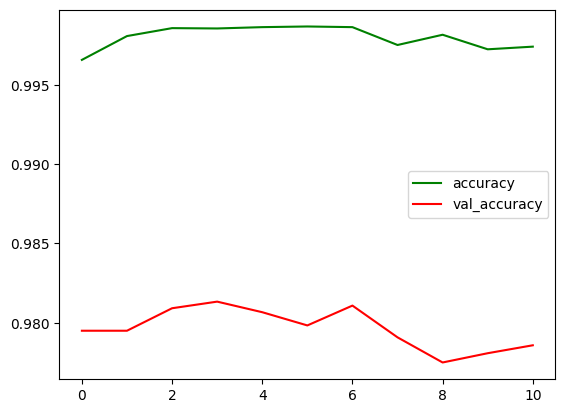

In [43]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()
     

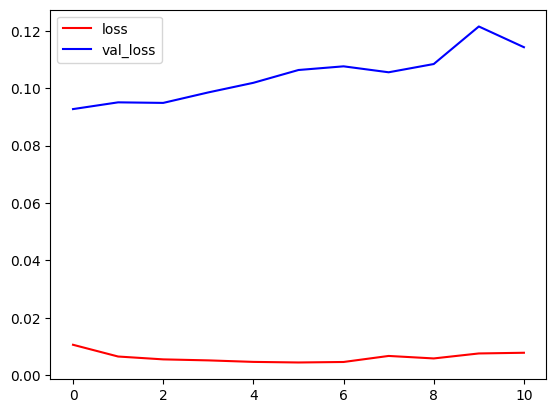

In [44]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()